# Import data

In [1]:
import pandas as pd
data = "airlinedelaycauses_DelayedFlights.csv"
data = pd.read_csv(data)
airline_df = pd.DataFrame(data = data)

# Preprocess

In [2]:
# drop the row if there is missing data 
airline_df = airline_df.dropna(axis=0, how='any')
airline_df.isnull().sum()

Unnamed: 0           0
Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [3]:
# check if the index of the column are the same throughout the dataset
# if so, drop or simply ignore the column because there are not meaningful to visualize
if (  len(airline_df["CancellationCode"] == "N") == len(airline_df)):  print ("ignore CancellationCode column")
if (  len(airline_df["Cancelled"] == 0)  == len(airline_df)):  print ("ignore  Cancelled column")
if (  len(airline_df["Diverted"] == 0) == len(airline_df)):  print ("ignore  Diverted column")

ignore CancellationCode column
ignore  Cancelled column
ignore  Diverted column


In [4]:
if (  len(airline_df["Year"] == 2008) == len(airline_df)):  print ("The dataset is for 2008 only, ignore  Year column")

The dataset is for 2008 only, ignore  Year column


In [5]:
# drop the columns
airline_df = airline_df.drop('CancellationCode', axis=1) 
airline_df = airline_df.drop("Cancelled", axis=1) 
airline_df = airline_df.drop("Diverted", axis=1) 
airline_df = airline_df.drop("Year", axis=1) 
airline_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1247486 entries, 3 to 1936755
Data columns (total 26 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Unnamed: 0         1247486 non-null  int64  
 1   Month              1247486 non-null  int64  
 2   DayofMonth         1247486 non-null  int64  
 3   DayOfWeek          1247486 non-null  int64  
 4   DepTime            1247486 non-null  float64
 5   CRSDepTime         1247486 non-null  int64  
 6   ArrTime            1247486 non-null  float64
 7   CRSArrTime         1247486 non-null  int64  
 8   UniqueCarrier      1247486 non-null  object 
 9   FlightNum          1247486 non-null  int64  
 10  TailNum            1247486 non-null  object 
 11  ActualElapsedTime  1247486 non-null  float64
 12  CRSElapsedTime     1247486 non-null  float64
 13  AirTime            1247486 non-null  float64
 14  ArrDelay           1247486 non-null  float64
 15  DepDelay           1247486 non-null  

# Dashboard

## first dashboard, Arrival vs Departure Delay of each airline

In [6]:
## check the unique airline/carrier
# airline_df["UniqueCarrier"].unique()

array(['WN', 'XE', 'YV', 'OH', 'OO', 'UA', 'US', 'DL', 'EV', 'F9', 'FL',
       'HA', 'MQ', 'NW', '9E', 'AA', 'AQ', 'AS', 'B6', 'CO'], dtype=object)

In [21]:
## check the count for each airline/carrier
# airline_df["UniqueCarrier"].value_counts()

UniqueCarrier
WN    203559
AA    132257
MQ     97555
UA     95465
OO     88991
DL     72252
XE     72008
US     59508
CO     58958
EV     56781
NW     54744
YV     50646
FL     46991
OH     39292
B6     38232
9E     35630
AS     24012
F9     15940
HA      4325
AQ       340
Name: count, dtype: int64

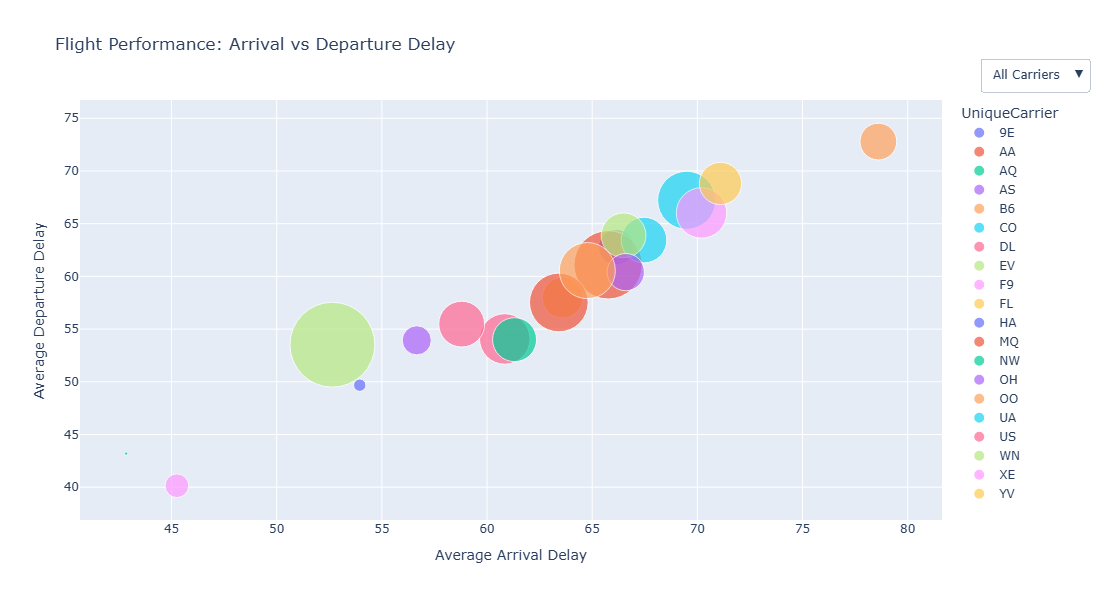

In [22]:
import pandas as pd
import plotly.express as px

# Create the interactive scatter plot
def create_interactive_plot(airline_df):
    # Group by 'UniqueCarrier' to calculate the average delays and flight count
    new_airline_data = airline_df.groupby('UniqueCarrier').agg(
        AveArrDelay=('ArrDelay', 'mean'),
        AveDepDelay=('DepDelay', 'mean'),
        FlightCount=('UniqueCarrier', 'size')
    ).reset_index()
    
    # scatter plot
    fig = px.scatter(
        new_airline_data, 
        x="AveArrDelay", 
        y="AveDepDelay", 
        # The size of the dots is based on the total number of flights
        size="FlightCount",  
        # Every carriers have different color
        color="UniqueCarrier",  
        # Show the carrier name on hover
        hover_name="UniqueCarrier",  
        # label of the plot
        title="Flight Performance: Arrival vs Departure Delay",
        labels={"AveArrDelay": "Average Arrival Delay", "AveDepDelay": "Average Departure Delay"},
        size_max=60
    )
    
    # Add dropdown for filtering by carriers
    fig.update_layout(
        # set the size of the figure
        width = 1000,  
        height = 600, 
        
        updatemenus=[
            {
                'buttons': [
                    {
                        'label': 'All Carriers',
                        'method': 'update',
                        'args': [{'visible': [True] * len(new_airline_data)}, {'title': 'All Carriers'}]
                    },
                ] + [
                    {
                        'label': carrier,
                        'method': 'update',
                        'args': [
                            {'visible': new_airline_data['UniqueCarrier'] == carrier}, 
                            {'title': f"Carrier: {carrier}"}
                        ]
                    }
                    for carrier in new_airline_data['UniqueCarrier'].unique()
                ],
                
                'direction': 'down',
                'showactive': True,
                'x': 1.17,
                'y': 1.1,
                'xanchor': 'right',
                'yanchor': 'top'
            }
        ]
    )
    
    # Show the figure
    fig.show()

# Run the function with the data
create_interactive_plot(airline_df)


## second dashboard, Arrival vs Departure Delay of each airport
same as the previous one. 

In [30]:
(airline_df['Origin']== 'ABE').sum() + (airline_df['Dest']== 'ABE').sum()

1602

In [45]:
## new dataset of the airport, including its DepDelay and ArrDelay
# Group by 'Origin' to calculate the average arrival delay and flight count for each destination/distance
new_DepAirport_data = airline_df.groupby('Origin').agg(
    AveDepDelay=('DepDelay', 'mean'),
    FlightCount_Dep=('Origin', 'size')
).reset_index()
new_DepAirport_data.rename(columns={'Origin': 'Airport'}, inplace=True)

# Group by 'Dest' to calculate the average arrival delay and flight count for each destination/distance
new_ArrAirport_data = airline_df.groupby('Dest').agg( 
    AveArrDelay=('ArrDelay', 'mean'),
    FlightCount_Arr=('Dest', 'size') 
).reset_index()
# rename the 
new_ArrAirport_data.rename(columns={'Dest': 'Airport'}, inplace=True)

# Merge the two DataFrames on 'Origin'
new_airport_data = pd.merge(
    new_DepAirport_data, 
    new_ArrAirport_data, 
    on='Airport', 
    # Use inner join to match records based on Airport
    how='inner'  
)

# Add a new column for the total flight count (sum of departure and arrival flight counts)
new_airport_data['TotalFlightCount'] = new_airport_data['FlightCount_Dep'] + new_airport_data['FlightCount_Arr']

new_airport_data

,Airport,AveDepDelay,FlightCount_Dep,AveArrDelay,FlightCount_Arr,TotalFlightCount
0,ABE,75.726208,683,67.791077,919,1602
1,ABI,92.428571,266,51.308511,564,830
2,ABQ,53.894890,6184,52.619906,6993,13177
3,ABY,63.424528,212,61.182979,235,447
4,ACK,88.173913,138,73.472000,125,263
...,...,...,...,...,...,...
296,WYS,58.333333,3,44.812500,16,19
297,XNA,71.751935,2584,63.583815,2941,5525
298,YAK,68.143791,153,66.551546,194,347
299,YKM,31.500000,32,41.296296,27,59


In [42]:
# check the max average dep delay
# new_airport_data['AveDepDelay'].max()

184.36363636363637

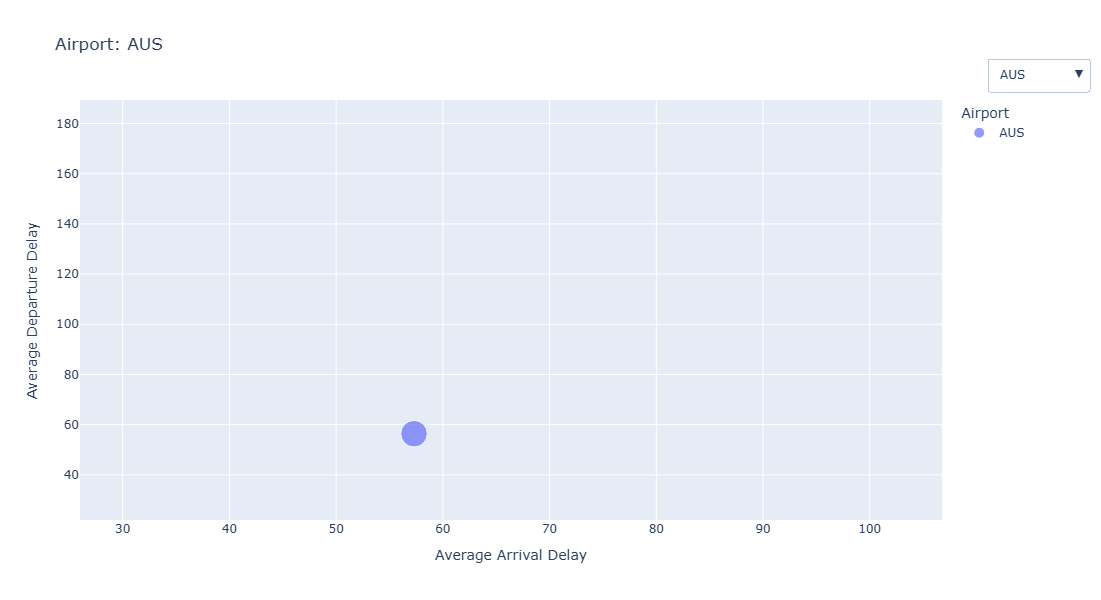

In [44]:
import pandas as pd
import plotly.express as px

# Create the interactive scatter plot
def create_interactive_plot(airline_df):
    ## DataSet
   # Group by 'Origin' to calculate the average arrival delay and flight count for each destination/distance
    new_DepAirport_data = airline_df.groupby('Origin').agg(
        AveDepDelay=('DepDelay', 'mean'),
        FlightCount_Dep=('Origin', 'size')
    ).reset_index()
    new_DepAirport_data.rename(columns={'Origin': 'Airport'}, inplace=True)
    
    # Group by 'Dest' to calculate the average arrival delay and flight count for each destination/distance
    new_ArrAirport_data = airline_df.groupby('Dest').agg( 
        AveArrDelay=('ArrDelay', 'mean'),
        FlightCount_Arr=('Dest', 'size') 
    ).reset_index()
    # rename the 
    new_ArrAirport_data.rename(columns={'Dest': 'Airport'}, inplace=True)
    
    # Merge the two DataFrames on 'Origin'
    new_airport_data = pd.merge(
        new_DepAirport_data, 
        new_ArrAirport_data, 
        on='Airport', 
        # Use inner join to match records based on Airport
        how='inner'  
    )
    
    # Add a new column for the total flight count (sum of departure and arrival flight counts)
    new_airport_data['TotalFlightCount'] = new_airport_data['FlightCount_Dep'] + new_airport_data['FlightCount_Arr']
    
    ## scatter plot
    fig = px.scatter(
        new_airport_data, 
        x="AveArrDelay", 
        y="AveDepDelay", 
        # The size of the dots is based on the total number of flights
        size="TotalFlightCount",  
        # Every carriers have different color
        color="Airport",  
        # Show the carrier name on hover
        hover_name="Airport",  
        # label of the plot
        title="Airport Performance: Arrival vs Departure Delay",
        labels={"AveArrDelay": "Average Arrival Delay", "AveDepDelay": "Average Departure Delay"},
        size_max=60
    )
    
    # Add dropdown for filtering by carriers
    fig.update_layout(
        # set the size of the figure
        width = 1000,  
        height = 600, 

        xaxis=dict(
            title="Average Arrival Delay",
            range=[new_airport_data['AveArrDelay'].min()-5, new_airport_data['AveArrDelay'].max()+5]  
        ),
        yaxis=dict(
            title="Average Departure Delay",
            range=[new_airport_data['AveDepDelay'].min()-1, new_airport_data['AveDepDelay'].max()+5]  
        ),
        
        updatemenus=[
            {
                'buttons': [
                    {
                        'label': 'All Airport',
                        'method': 'update',
                        'args': [{'visible': [True] * len(new_airport_data)}, {'title': 'All Airport'}]
                    },
                ] + [
                    {
                        'label': airport,
                        'method': 'update',
                        'args': [
                            {'visible': new_airport_data['Airport'] == airport}, 
                            {'title': f"Airport: {airport}"}
                        ]
                    }
                    for airport in new_airport_data['Airport'].unique()
                ],
                
                'direction': 'down',
                'showactive': True,
                'x': 1.17,
                'y': 1.1,
                'xanchor': 'right',
                'yanchor': 'top'
            }
        ]
    )
    
    # Show the figure
    fig.show()




# Run the function with the data
create_interactive_plot(airline_df)
